In [1]:
import non_local_detector

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Cupy is not installed or GPU is not detected. Ignore this message if not using GPU
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/replay_trajectory_classification/likelihoods/multiunit_likelihood.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
non_local_detector.__version__

'0.1.dev8+gd001044.d20230607'

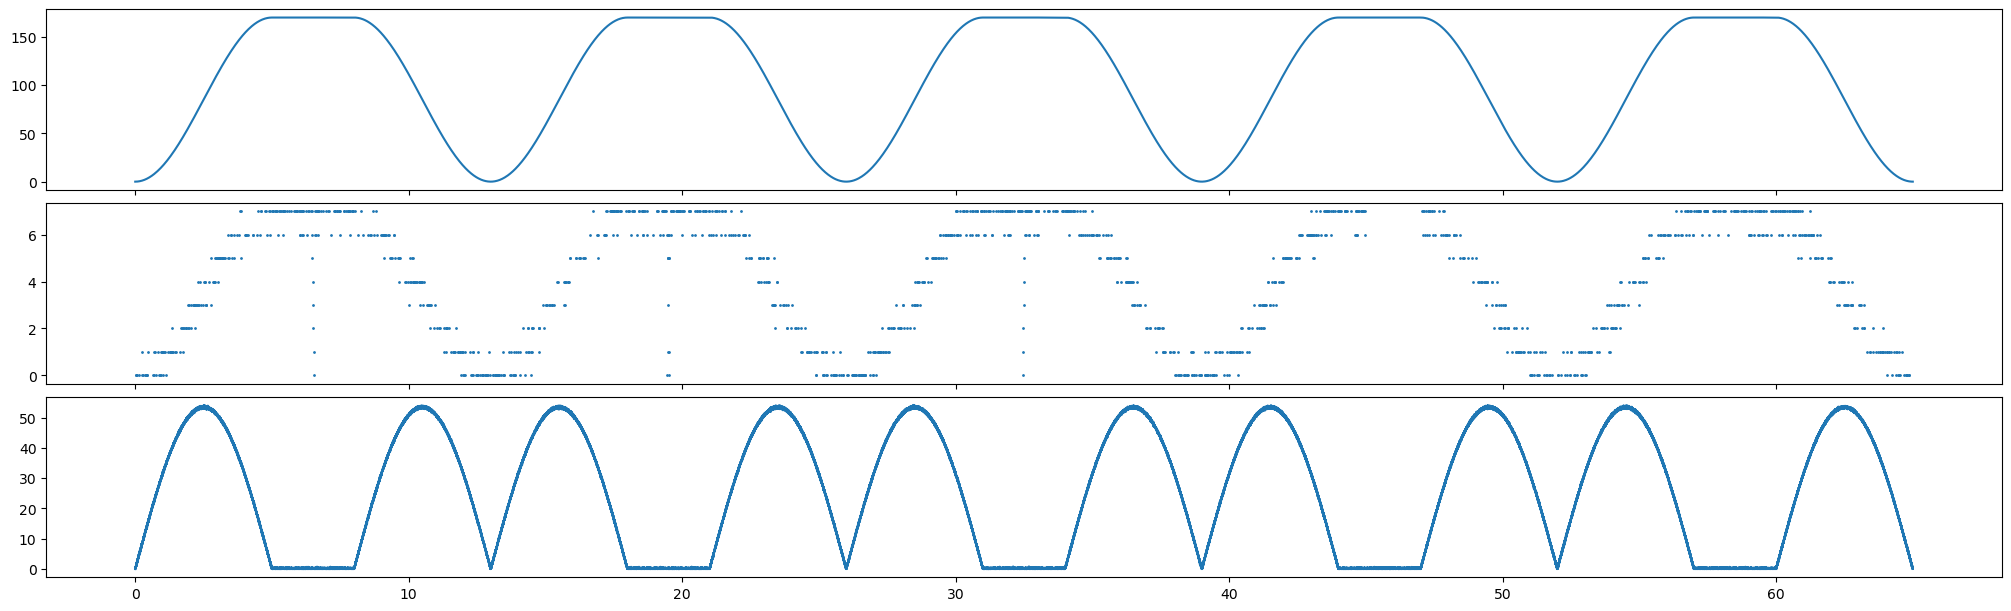

In [3]:
from non_local_detector.simulate.sorted_spikes_simulation import make_simulated_data

import matplotlib.pyplot as plt
import numpy as np

speed, position, spikes, time, ripple_times, sampling_frequency = make_simulated_data()

is_ripple = np.zeros_like(time, dtype=bool)
for ripple_time in ripple_times:
    is_ripple |= (time >= ripple_time[0]) & (time <= ripple_time[1])


fig, axes = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(20, 6))
axes[0].plot(time, position)
spike_time_ind, neuron_ind = np.nonzero(spikes)
axes[1].scatter(time[spike_time_ind], neuron_ind, s=1)
axes[2].plot(time, speed)

In [4]:
from non_local_detector import SortedSpikesDetector

detector = SortedSpikesDetector()

In [5]:
detector.initialize_environments(position)

In [6]:
detector.initialize_initial_conditions()

In [7]:
detector.initial_conditions_.sum()

1.0

In [8]:
detector.initalize_state_index()

In [9]:
detector.state_ind_

array([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
detector.bin_sizes_

array([ 1,  1, 86, 86])

In [11]:
detector.initialize_continuous_state_transition()

In [12]:
for i in range(4):
    for j in range(4):
        print(detector.continuous_state_transitions_[np.ix_(detector.state_ind_ == i, detector.state_ind_ == j)].sum(axis=-1))

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 

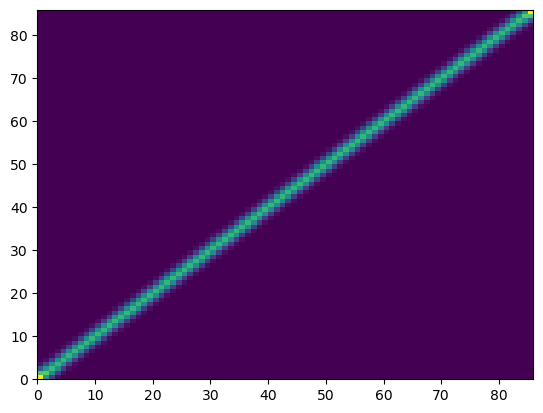

In [13]:

plt.pcolormesh(detector.continuous_state_transitions_[np.ix_(detector.state_ind_ == 2, detector.state_ind_ == 2)].T, vmin=0.0)

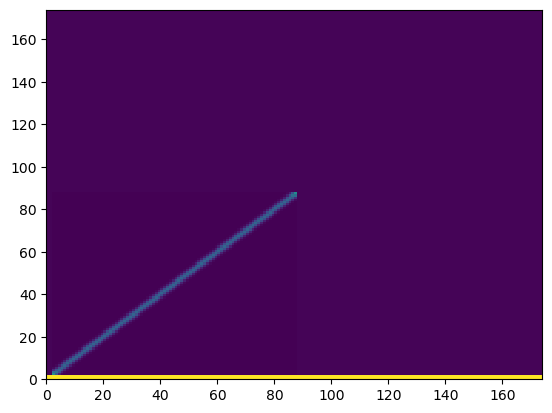

In [14]:
plt.pcolormesh(detector.continuous_state_transitions_.T)

In [15]:
detector.initialize_discrete_state_transition()

In [16]:
detector.discrete_state_transition_

array([[0.9       , 0.03333333, 0.03333333, 0.03333333],
       [0.03333333, 0.9       , 0.03333333, 0.03333333],
       [0.03333333, 0.03333333, 0.9       , 0.03333333],
       [0.00666667, 0.00666667, 0.00666667, 0.98      ]])

In [17]:
detector.discrete_state_transition_.sum(axis=-1)

array([1., 1., 1., 1.])

In [18]:
detector.continuous_state_transitions_

array([[1.        , 1.        , 0.01162791, ..., 0.01162791, 0.01162791,
        0.01162791],
       [1.        , 1.        , 0.01162791, ..., 0.01162791, 0.01162791,
        0.01162791],
       [1.        , 1.        , 0.48708192, ..., 0.01162791, 0.01162791,
        0.01162791],
       ...,
       [1.        , 1.        , 0.01162791, ..., 0.01162791, 0.01162791,
        0.01162791],
       [1.        , 1.        , 0.01162791, ..., 0.01162791, 0.01162791,
        0.01162791],
       [1.        , 1.        , 0.01162791, ..., 0.01162791, 0.01162791,
        0.01162791]])

In [21]:
blah = detector.continuous_state_transitions_ * detector.discrete_state_transition_[np.ix_(detector.state_ind_, detector.state_ind_)]
blah

array([[9.00000000e-01, 3.33333333e-02, 3.87596899e-04, ...,
        3.87596899e-04, 3.87596899e-04, 3.87596899e-04],
       [3.33333333e-02, 9.00000000e-01, 3.87596899e-04, ...,
        3.87596899e-04, 3.87596899e-04, 3.87596899e-04],
       [3.33333333e-02, 3.33333333e-02, 4.38373729e-01, ...,
        3.87596899e-04, 3.87596899e-04, 3.87596899e-04],
       ...,
       [6.66666667e-03, 6.66666667e-03, 7.75193798e-05, ...,
        1.13953488e-02, 1.13953488e-02, 1.13953488e-02],
       [6.66666667e-03, 6.66666667e-03, 7.75193798e-05, ...,
        1.13953488e-02, 1.13953488e-02, 1.13953488e-02],
       [6.66666667e-03, 6.66666667e-03, 7.75193798e-05, ...,
        1.13953488e-02, 1.13953488e-02, 1.13953488e-02]])

In [22]:
blah.sum(axis=-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])